### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [2]:
train = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Hackathon\Train.csv")
test = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Hackathon\Test.csv")

train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [3]:
test.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2106 non-null   float64
 3   Genre            2143 non-null   object 
 4   Publisher        2138 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     920 non-null    float64
 9   Critic_Count     920 non-null    float64
 10  User_Score       1255 non-null   object 
 11  User_Count       794 non-null    float64
 12  Developer        1267 non-null   object 
 13  Rating           1246 non-null   object 
dtypes: float64(7), object(7)
memory usage: 234.5+ KB


In [6]:
train.shape

(14576, 15)

In [7]:
test.shape

(2143, 14)

### Null Values Treatment

In [8]:
train_null_percent = (train.isnull().sum() / train.shape[0]) * 100
train_null_percent

Name                0.013721
Platform            0.000000
Year_of_Release     1.591658
Genre               0.013721
Publisher           0.336169
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Critic_Score       50.487102
Critic_Count       50.487102
User_Score         39.901207
User_Count         53.375412
Developer          39.427827
Rating             40.285401
Global_Sales        0.000000
dtype: float64

In [9]:
test_null_percent = (test.isnull().sum() / test.shape[0]) * 100
test_null_percent

Name                0.000000
Platform            0.000000
Year_of_Release     1.726552
Genre               0.000000
Publisher           0.233318
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Critic_Score       57.069529
Critic_Count       57.069529
User_Score         41.437238
User_Count         62.949137
Developer          40.877275
Rating             41.857210
dtype: float64

In [10]:
train_cols = train_null_percent[train_null_percent >= 30].index
train_cols

Index(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [11]:
test_cols = test_null_percent[test_null_percent >= 40].index
test_cols

Index(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [12]:
train_1 = train.drop(train_cols, axis=1)
test_1 = test.drop(test_cols, axis=1)

In [13]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Global_Sales     14576 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.0+ MB


In [14]:
train_1["Year_of_Release"].fillna(train_1["Year_of_Release"].mean(), inplace=True)
train_1.dropna(inplace=True)
test_1["Year_of_Release"].fillna(test_1["Year_of_Release"].mean(), inplace=True)

In [15]:
train_1.shape

(14525, 9)

In [16]:
test_1.shape

(2143, 8)

In [17]:
train_1.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Global_Sales       0
dtype: int64

In [18]:
test_1.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          5
NA_Sales           0
EU_Sales           0
JP_Sales           0
dtype: int64

### Outlier Analysis and Treatment

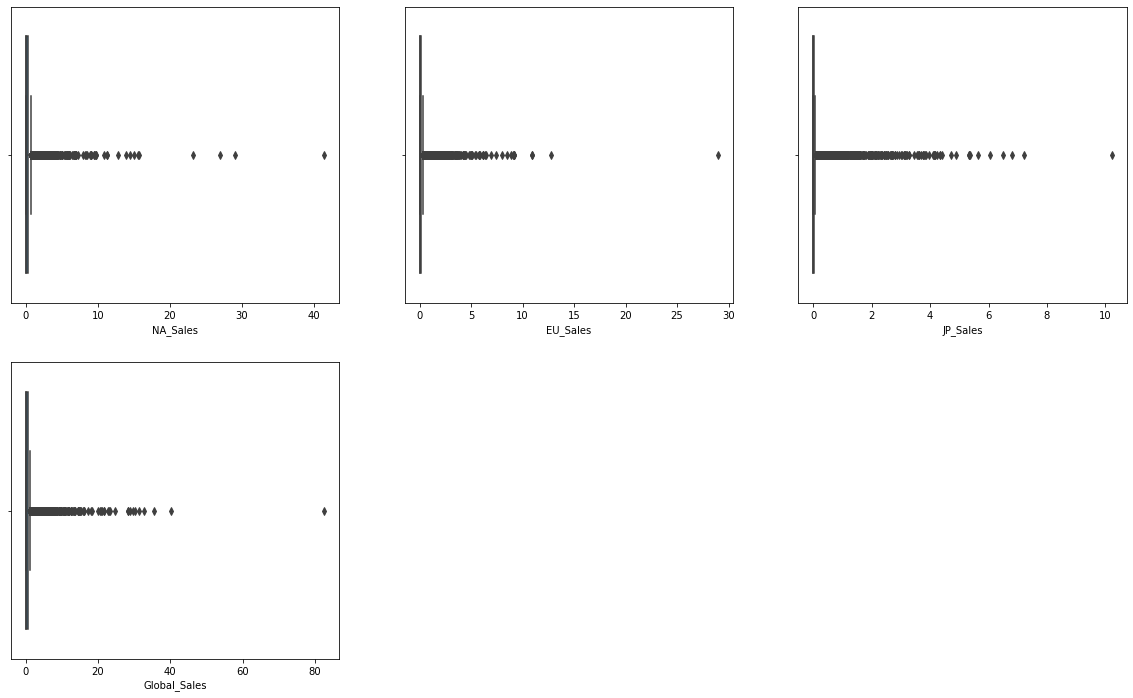

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x = 'NA_Sales', data = train_1)
plt.subplot(2, 3, 2)
sns.boxplot(x = 'EU_Sales', data = train_1)
plt.subplot(2, 3, 3)
sns.boxplot(x = 'JP_Sales', data = train_1)
plt.subplot(2, 3, 4)
sns.boxplot(x = 'Global_Sales', data = train_1)
plt.show()

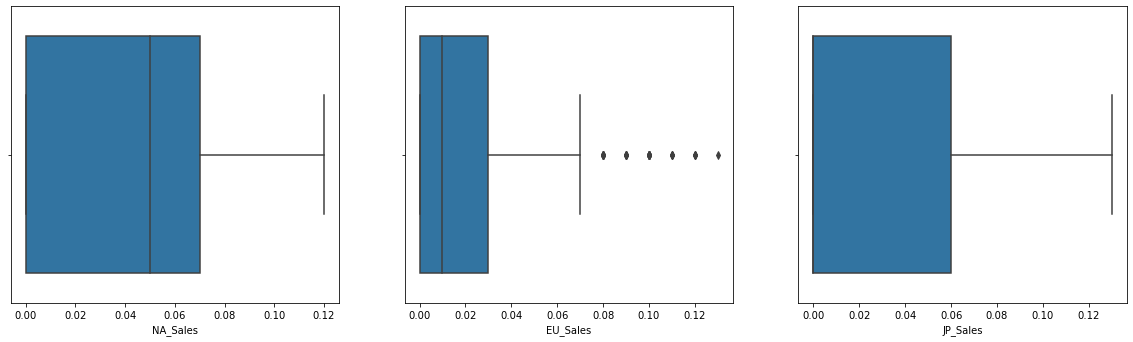

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x = 'NA_Sales', data = test_1)
plt.subplot(2, 3, 2)
sns.boxplot(x = 'EU_Sales', data = test_1)
plt.subplot(2, 3, 3)
sns.boxplot(x = 'JP_Sales', data = test_1)
plt.show()

In [21]:
num_vars = ["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]
for var in num_vars:
    Q1 = train_1[var].quantile(0.25)
    Q3 = train_1[var].quantile(0.75)
    IQR = Q3 - Q1
    train_1.loc[(train_1[var] < Q1 - 1.5 * IQR) | (train_1[var] > Q3 + 1.5 * IQR), var] = train[var].mean()

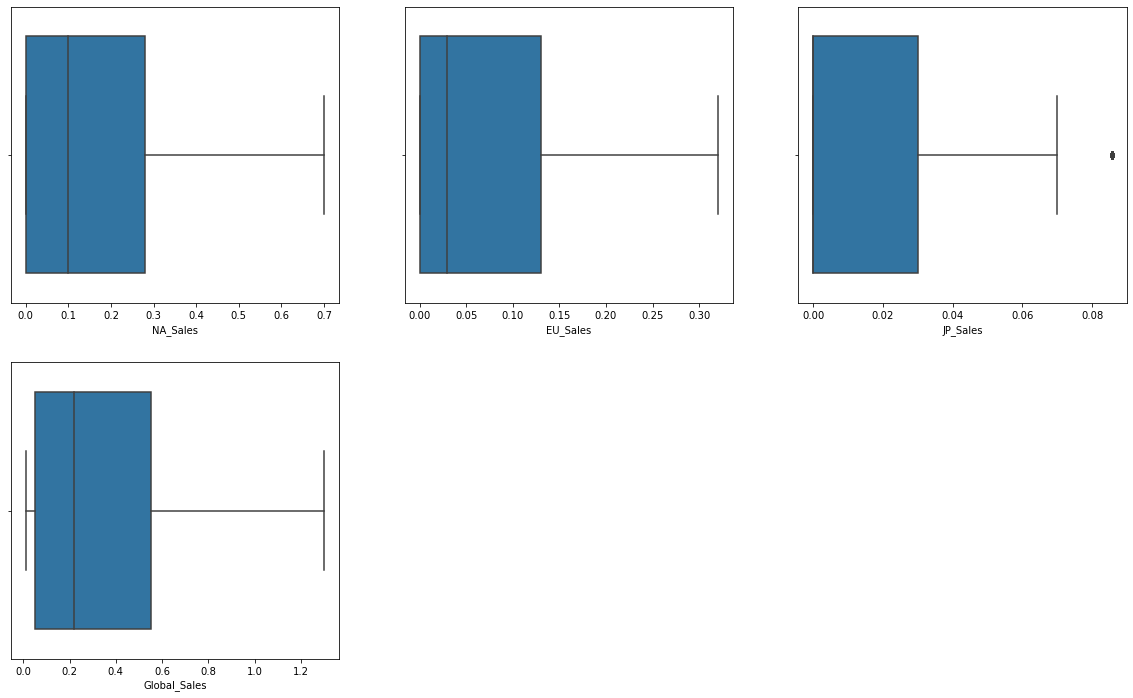

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x = 'NA_Sales', data = train_1)
plt.subplot(2, 3, 2)
sns.boxplot(x = 'EU_Sales', data = train_1)
plt.subplot(2, 3, 3)
sns.boxplot(x = 'JP_Sales', data = train_1)
plt.subplot(2, 3, 4)
sns.boxplot(x = 'Global_Sales', data = train_1)
plt.show()

In [23]:
train_1.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
10320,Alvin and the Chipmunks: Chipwrecked,Wii,2011.000000,Misc,505 Games,0.070000,0.010000,0.000000,0.090000
11359,Sébastien Loeb Rally Evo,PS4,2016.000000,Racing,Milestone S.r.l,0.000000,0.040000,0.000000,0.040000
7335,Gekijouban Macross F: Itsuwarino Utahime - Hyb...,PS3,2010.000000,Action,Namco Bandai Games,0.000000,0.000000,0.085659,0.210000
14339,Cartoon Network Battle Crashers,3DS,2016.000000,Action,FuRyu Corporation,0.010000,0.000000,0.000000,0.010000
12359,Far East of Eden Shinden,NG,1995.000000,Fighting,Hudson Soft,0.000000,0.000000,0.030000,0.030000
1156,Silent Hill,PS,1999.000000,Action,Konami Digital Entertainment,0.295577,0.163957,0.085659,0.598972
12790,The King of Fighters: Maximum Impact - Maniax,XB,2006.437117,Fighting,Unknown,0.020000,0.010000,0.000000,0.030000
11189,Worms Reloaded,PC,2010.000000,Strategy,Team17 Software,0.000000,0.040000,0.000000,0.050000
14273,Legend of Kay Anniversary,WiiU,2015.000000,Action,Nordic Games,0.000000,0.010000,0.000000,0.010000
14111,Izumo 2,PS2,2006.000000,Adventure,GN Software,0.000000,0.000000,0.010000,0.010000


In [24]:
train_1.shape

(14525, 9)

In [25]:
test_1.shape

(2143, 8)

In [26]:
train_2 = train_1.copy(deep=True)
train_2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,0.295577,0.163957,0.085659,0.598972
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0.295577,0.163957,0.085659,0.598972
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.295577,0.163957,0.085659,0.598972
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.295577,0.163957,0.085659,0.598972
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.295577,0.163957,0.085659,0.598972


In [27]:
train_2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales
count,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000
mean,2006.439938,0.148984,0.066270,0.021560,0.313938
std,5.914150,0.161378,0.078936,0.033343,0.296466
min,1980.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.050000
50%,2007.000000,0.100000,0.030000,0.000000,0.220000
75%,2010.000000,0.280000,0.130000,0.030000,0.550000
max,2020.000000,0.700000,0.320000,0.085659,1.300000


In [28]:
train_2.describe(include="object")

,Name,Platform,Genre,Publisher
count,14525,14525,14525,14525
unique,10282,31,12,552
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts
freq,11,1933,2969,1267


In [29]:
test_1.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales
count,2143.000000,2143.000000,2143.000000,2143.000000
mean,2006.829535,0.043999,0.016253,0.022804
std,5.270100,0.036211,0.020982,0.038525
min,1981.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000
50%,2008.000000,0.050000,0.010000,0.000000
75%,2010.000000,0.070000,0.030000,0.060000
max,2016.000000,0.120000,0.130000,0.130000


In [30]:
test_1.describe(include="object")

,Name,Platform,Genre,Publisher
count,2143,2143,2143,2138
unique,1988,26,12,270
top,DreamWorks Super Star Kartz,DS,Action,Namco Bandai Games
freq,5,369,396,161


### Correlation

In [31]:
train_2.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Year_of_Release,1.000000,-0.117318,-0.013616,-0.122712,-0.158979
NA_Sales,-0.117318,1.000000,0.600835,-0.084257,0.775991
EU_Sales,-0.013616,0.600835,1.000000,-0.035698,0.693286
JP_Sales,-0.122712,-0.084257,-0.035698,1.000000,0.185594
Global_Sales,-0.158979,0.775991,0.693286,0.185594,1.000000


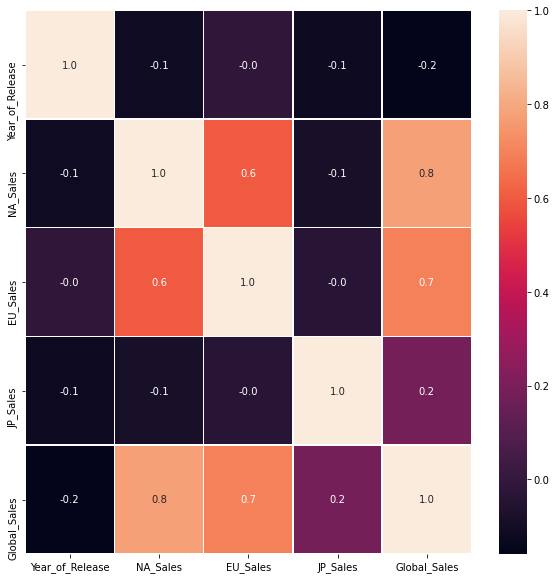

In [32]:
#correlation map
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_2.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)
plt.show()

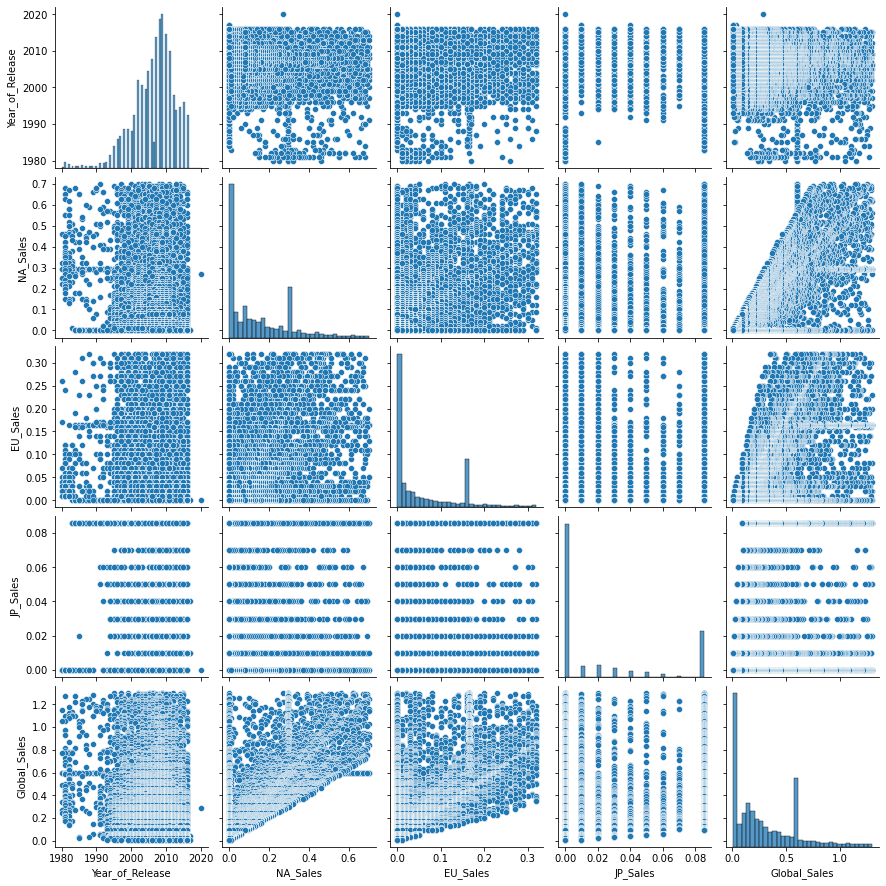

In [33]:
sns.pairplot(train_2)
plt.show()

In [34]:
train_2["Year_of_Release"] = train_2["Year_of_Release"].astype(int)
test_1["Year_of_Release"] = test_1["Year_of_Release"].astype(int)

In [35]:
drop_list = ['Name', 'Publisher', "Platform"]
data_cleaned1 = train_2.drop(drop_list, axis=1)
data_cleaned1.sample(10)

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales
10405,2010,Shooter,0.060000,0.020000,0.000000,0.09
5163,1996,Adventure,0.000000,0.000000,0.085659,0.36
6353,2011,Action,0.110000,0.090000,0.040000,0.27
1614,2001,Platform,0.600000,0.163957,0.000000,1.23
5202,1993,Action,0.250000,0.100000,0.000000,0.36
2087,2005,Platform,0.295577,0.200000,0.000000,0.99
9650,2005,Puzzle,0.080000,0.020000,0.000000,0.11
11211,2005,Platform,0.040000,0.010000,0.000000,0.05
12676,2009,Role-Playing,0.000000,0.000000,0.030000,0.03
4686,2015,Action,0.220000,0.150000,0.000000,0.41


In [36]:
data_cleaned2 = test_1.drop(drop_list, axis=1)
data_cleaned2.sample(10)

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales
1365,2010,Simulation,0.02,0.04,0.00
2118,1995,Puzzle,0.03,0.02,0.00
33,2009,Puzzle,0.12,0.00,0.00
805,2004,Role-Playing,0.00,0.00,0.08
585,2005,Action,0.09,0.03,0.00
2130,2013,Shooter,0.00,0.06,0.00
1443,2006,Shooter,0.04,0.02,0.00
327,2011,Misc,0.10,0.01,0.00
1360,2004,Strategy,0.04,0.03,0.00
607,2014,Simulation,0.02,0.09,0.00


### Dummy Encoding of Categorical data

In [37]:
data_with_dummies1 = pd.get_dummies(data_cleaned1, columns=["Genre"])
data_with_dummies1.sample(10)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
13209,2006,0.010000,0.010000,0.000000,0.020000,0,0,0,0,0,0,0,0,0,0,0,1
4685,2013,0.070000,0.200000,0.085659,0.410000,1,0,0,0,0,0,0,0,0,0,0,0
10156,2010,0.000000,0.000000,0.085659,0.090000,0,1,0,0,0,0,0,0,0,0,0,0
3347,1997,0.090000,0.260000,0.085659,0.600000,0,0,0,0,0,0,0,0,0,0,1,0
1371,2013,0.295577,0.163957,0.000000,0.598972,0,0,0,0,0,0,0,1,0,0,0,0
5923,2003,0.220000,0.060000,0.000000,0.300000,1,0,0,0,0,0,0,0,0,0,0,0
11299,2000,0.030000,0.020000,0.000000,0.050000,0,0,0,1,0,0,0,0,0,0,0,0
13190,2007,0.020000,0.000000,0.000000,0.020000,1,0,0,0,0,0,0,0,0,0,0,0
2318,2003,0.440000,0.163957,0.000000,0.900000,0,0,0,0,0,0,0,0,0,0,1,0
7511,2009,0.000000,0.000000,0.085659,0.200000,0,0,0,0,0,1,0,0,0,0,0,0


In [38]:
data_with_dummies2 = pd.get_dummies(data_cleaned2, columns=["Genre"])
data_with_dummies2.sample(10)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
1011,2005,0.06,0.02,0.00,0,0,0,0,0,0,0,0,1,0,0,0
1643,1998,0.00,0.00,0.07,0,0,0,0,0,0,0,0,0,0,1,0
2107,2006,0.05,0.01,0.00,0,0,0,0,0,0,0,0,0,0,0,1
546,2014,0.08,0.00,0.01,1,0,0,0,0,0,0,0,0,0,0,0
1793,2009,0.06,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1
1941,2008,0.06,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0
1792,2007,0.00,0.05,0.00,0,0,0,0,0,0,0,0,0,0,0,1
1629,2011,0.00,0.06,0.00,0,0,0,0,1,0,0,0,0,0,0,0
1485,2006,0.00,0.00,0.07,0,0,1,0,0,0,0,0,0,0,0,0
1614,2006,0.04,0.02,0.00,1,0,0,0,0,0,0,0,0,0,0,0


### Standardise Data

In [39]:
from sklearn.preprocessing import MinMaxScaler

cols = data_with_dummies1.drop(['Global_Sales'], axis=1).columns
X = data_with_dummies1[cols]
scaler = MinMaxScaler()
X[cols] = scaler.fit_transform(X)
y = data_with_dummies1['Global_Sales']

In [40]:
test_final = data_with_dummies2.copy(deep=True)
test_final[cols] = scaler.fit_transform(data_with_dummies2)

### Linear Regression (\Stochastic Gradient Descent)

In [41]:
from sklearn.linear_model import SGDRegressor

#build the model
SGD_model = SGDRegressor(loss='squared_loss')

#fit the model
SGD_model.fit(X, y)

SGDRegressor(loss='squared_loss')

### Predicting Global Sales

In [42]:
y_pred_SGD = SGD_model.predict(test_final)
y_pred_SGD

array([0.72568159, 0.59487108, 0.70501642, ..., 0.36837387, 0.16560933,
       0.30578236])

In [43]:
final_data = pd.DataFrame(columns=["name", "global sales"])
final_data["name"] = test_1.Name
final_data["global sales"] = y_pred_SGD
final_data

,name,global sales
0,Nicktoons: MLB,0.725682
1,Shonen Jump's One Piece: Grand Battle,0.594871
2,Learn Math,0.705016
3,Nitrobike,0.691504
4,Cruise Ship Vacation Games,0.705016
...,...,...
2138,Theresia...,0.274460
2139,Sacred 2: Fallen Angel,0.198978
2140,Dance Sensation!,0.368374
2141,Adventure Time: The Secret of the Nameless Kin...,0.165609


### Creating CSV file

In [44]:
final_data.to_csv(r"C:\zubeda\PGA02_Zubu\Hackathon\out.csv", index=False)